/c/Users/junec/AppData/Local/Programs/Python/Python38/python
load & denoise real field data===========================
---load data from 'txt' or 'xlsx' files...
check the time type
---denoising data using S-G smoothing...
---The first & second order derivative has been calculated and appended to pressure dataframe
len(ground_truth_denoised) 60
after remove uncorrect ground truth
len(ground_truth_denoised) 54


,Elapsed time(hr),Pressure(psia),first_order_derivative,second_order_derivative
count,29813.000000,29813.000000,29813.000000,29813.000000
mean,1949.504754,5858.252763,30.980488,-3316.399705
std,1071.285888,1201.608375,217.076860,26067.263416
min,0.000000,2989.186167,-1177.363679,-267661.267543
25%,1223.614626,4920.227064,-26.315082,-150.940811
50%,2055.749995,5958.685278,6.577672,0.048895
75%,2691.845828,6884.300893,50.575874,129.782625
max,4070.949737,7942.372157,1442.449150,199644.890976


,Elapsed time(hr),Liquid rate(STB/D)
count,10191.000000,10191.000000
mean,2210.383315,-16880.702745
std,1121.860526,4591.205914
min,0.433384,-22568.277381
25%,1345.039547,-19746.868884
50%,2248.487512,-18758.998204
75%,3074.228818,-15911.221687
max,4075.570423,1.166046


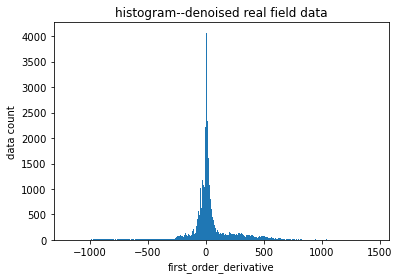

[(24833, 24872), (5698, 5833), (14471, 14575), (10149, 10224)]
47.913402758931625
-12.103679078019923
111.47517980463454
97.0315455031132


In [1]:
%run imports_N_loadDenoised.ipynb

In [2]:
class analyze_FOD_tangent(TangentMethod):
    def __init__(self,
                 pressure_df,
                 polynomial_order,
                 point_halfWindow,
                colum_names:Dict[str,Dict[str,str]]
                   ={"pressure":{"time":"Elapsed time",
                                 "measure":"Data",
                                 "first_order_derivative":"first_order_derivative",
                                 "second_order_derivative":"second_order_derivative"},
                    "rate":{"time":"Elapsed time","measure":"Liquid rate"}}):
        super().__init__(polynomial_order=polynomial_order,point_halfWindow=point_halfWindow)
        self.pressure_df=pressure_df
        self.colum_names=colum_names
        self.pressure_measure=list(pressure_df[self.colum_names["pressure"]["measure"]])
        self.pressure_time=list(pressure_df[self.colum_names["pressure"]["time"]])
    def get_FOD_tangent(self,points):
        """
        Returns:
        dataframe with column name:
        ["point_index","tangent_left","tangent_right","deltaTangent","first_order_derivative","Elapsed time"]
        """
        tangent_df=self.produce_tangent_inWindow(self.pressure_measure,
                                                 self.pressure_time,
                                                 points,
                                                 polynomial_order=self.polynomial_order,
                                                 point_halfWindow=self.point_halfWindow)   
        tangent_df["deltaTangent"]=tangent_df["tangent_right"]-tangent_df["tangent_left"]
        fod=pressure_df.iloc[tangent_df["point_index"],:]["first_order_derivative"]
        time=pressure_df.iloc[tangent_df["point_index"],:][self.colum_names["pressure"]["time"]]
        tangent_df["first_order_derivative"]=list(fod)
        tangent_df[self.colum_names["pressure"]["time"]]=list(time)
        return tangent_df
    
    def plot_tangent(self,points):
        tangent_plot=self.produce_tangent_inWindow(self.pressure_measure,
                                                 self.pressure_time,
                                                 points,
                                                   data_type="for_plot",
                                                   point_halfWindow=self.point_halfWindow,
                                                 polynomial_order=self.polynomial_order,
                                                 point_halfWindow_tagentPlot=self.point_halfWindow)
#         display(tangent_plot)
        for point_index in points:
            self.plot_tangent_inPointWindow(tangent_plot,point_index)

In [37]:
# polynomial_order=1
# point_halfWindow=10 
# FOD_tangent=analyze_FOD_tangent(pressure_df,polynomial_order,point_halfWindow,colum_names)
# points=[point_index for point_index in range(len(pressure_df)) ]  
# FOD_tangent_wholeData=FOD_tangent.get_FOD_tangent(points)
# display(FOD_tangent_wholeData)
# %store FOD_tangent_wholeData

-------calculate_Parameters_allCurve using 'polynomial' fitting


,point_index,tangent_left,tangent_right,deltaTangent,first_order_derivative,Elapsed time(hr)
0,10,53.55706,4.92578,-48.63128,7.337854,0.945833
1,11,28.51686,4.60809,-23.90877,6.935708,1.266667
2,12,18.53097,4.42777,-14.10320,12.669545,1.600000
3,13,15.00965,4.22599,-10.78366,26.740809,1.779167
4,14,13.52166,4.08898,-9.43268,2.011241,1.862500
...,...,...,...,...,...,...
29788,29798,4.82926,0.55433,-4.27493,3.734531,4055.058071
29789,29799,4.52504,0.49600,-4.02904,30.518256,4055.195571
29790,29800,4.42798,0.43383,-3.99415,0.413953,4055.212237
29791,29801,2.34013,0.38404,-1.95609,1.759684,4056.428904


Stored 'FOD_tangent_wholeData' (DataFrame)


<Figure size 1440x720 with 0 Axes>

In [5]:
polynomial_order=1
point_halfWindow=10 
FOD_tangent=analyze_FOD_tangent(pressure_df,polynomial_order,point_halfWindow,colum_names)

-------calculate_Parameters_allCurve using 'polynomial' fitting
   point_index  tangent_left  tangent_right
0        13852     -46.28772      -90.20230
1        13907    -372.41913     -521.34189
2        13909    -346.24296     -643.36076
3        13987     -92.98003     -113.17233


,point_index,tangent_left,tangent_right,deltaTangent,first_order_derivative,Elapsed time(hr)
0,13852,-46.28772,-90.20230,-43.91458,-475.801199,1943.529161
1,13907,-372.41913,-521.34189,-148.92276,-963.700346,1946.983328
2,13909,-346.24296,-643.36076,-297.11780,-963.876781,1947.012495
3,13987,-92.98003,-113.17233,-20.19230,-124.970432,1948.316661


-------calculate_Parameters_allCurve using 'polynomial' fitting
   point_index  tangent_left  tangent_right
0        12391    -672.25666     -699.59180
1        12463     -60.69203     -100.95288


,point_index,tangent_left,tangent_right,deltaTangent,first_order_derivative,Elapsed time(hr)
0,12391,-672.25666,-699.59180,-27.33514,-933.082084,1819.814631
1,12463,-60.69203,-100.95288,-40.26085,-80.978376,1820.964631


-------calculate_Parameters_allCurve using 'polynomial' fitting
=======point_index=========== 12391


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

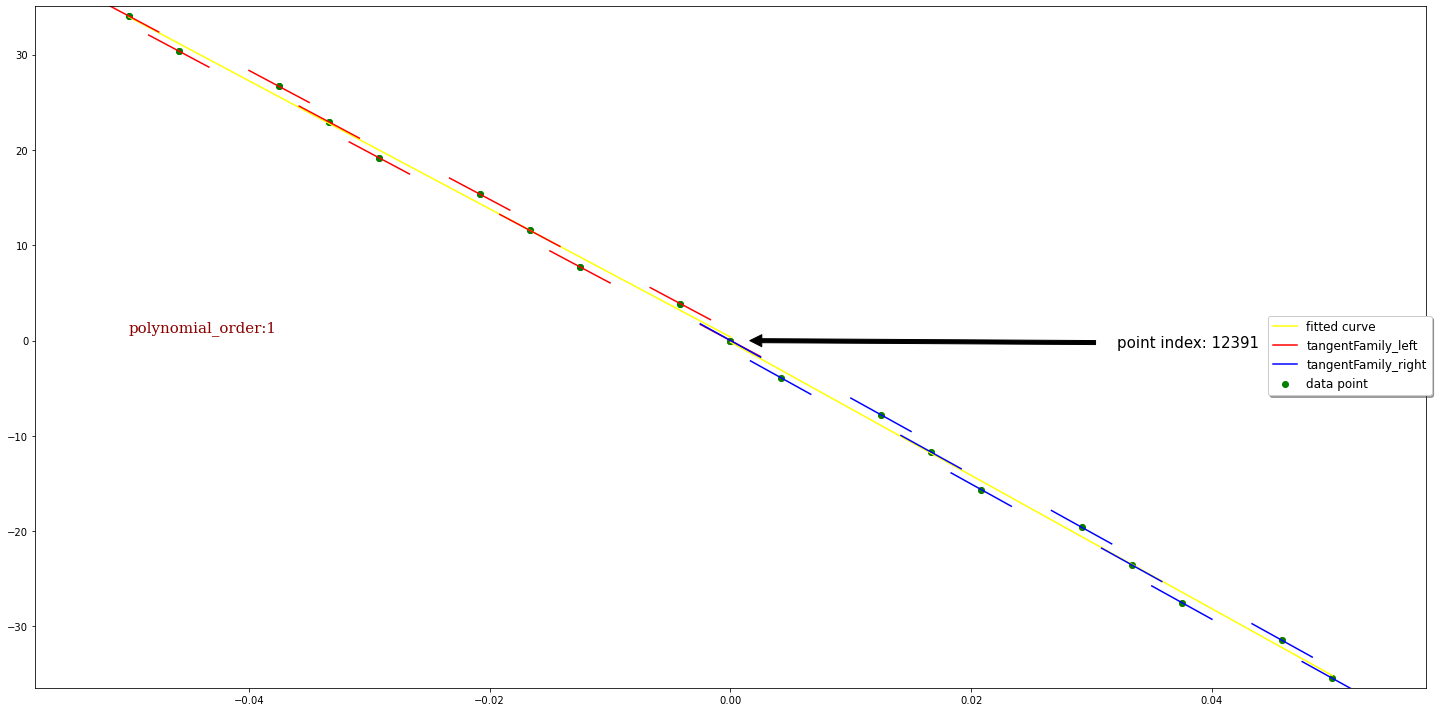

=======point_index=========== 12463


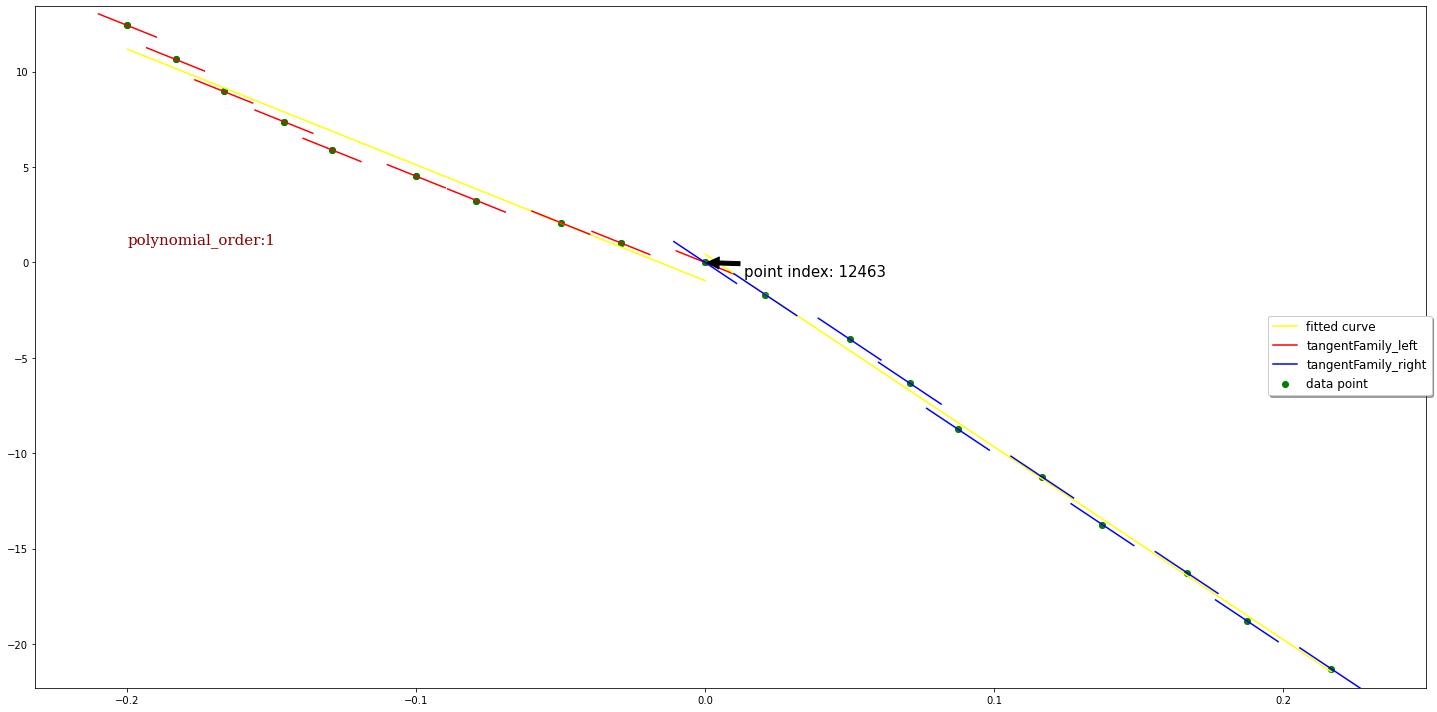

-------calculate_Parameters_allCurve using 'polynomial' fitting
   point_index  tangent_left  tangent_right
0         9040    -438.76951     -500.53325
1         9125     -62.96539      -86.41051


,point_index,tangent_left,tangent_right,deltaTangent,first_order_derivative,Elapsed time(hr)
0,9040,-438.76951,-500.53325,-61.76374,-642.180323,1358.831293
1,9125,-62.96539,-86.41051,-23.44512,-120.186696,1360.464626


-------calculate_Parameters_allCurve using 'polynomial' fitting
=======point_index=========== 9040


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

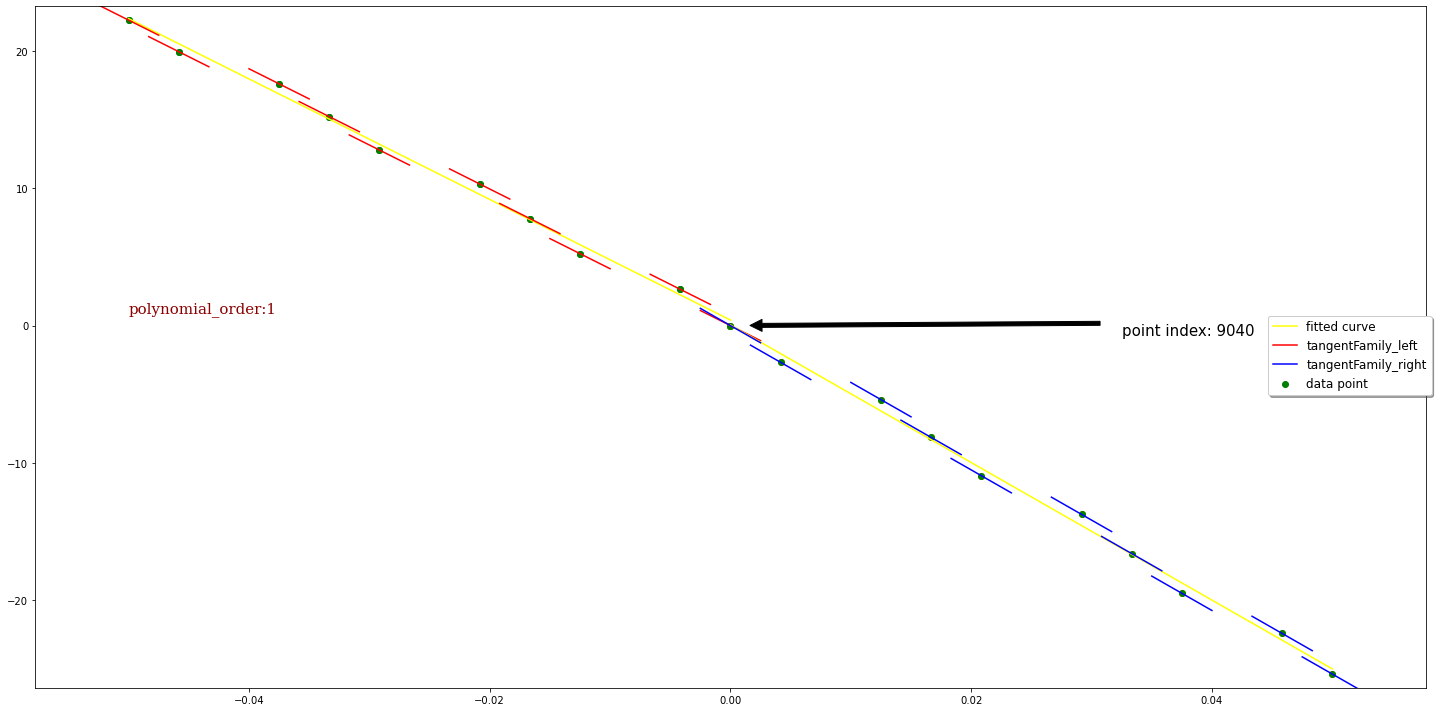

=======point_index=========== 9125


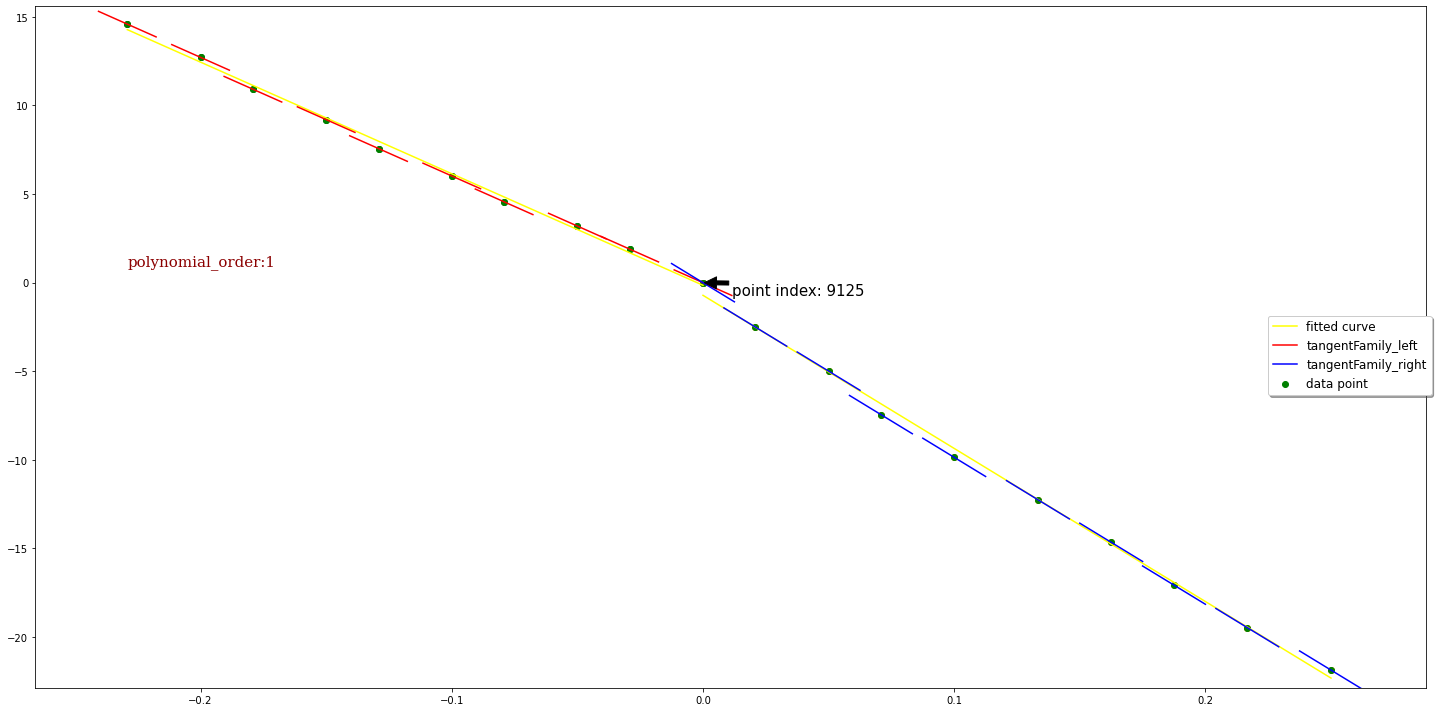

-------calculate_Parameters_allCurve using 'polynomial' fitting
   point_index  tangent_left  tangent_right
0         2257    -342.20375     -373.69272
1         2349     -46.42982      -66.58831


,point_index,tangent_left,tangent_right,deltaTangent,first_order_derivative,Elapsed time(hr)
0,2257,-342.20375,-373.69272,-31.48897,-510.962664,396.558355
1,2349,-46.42982,-66.58831,-20.15849,-91.721819,398.745855


-------calculate_Parameters_allCurve using 'polynomial' fitting
=======point_index=========== 2257


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

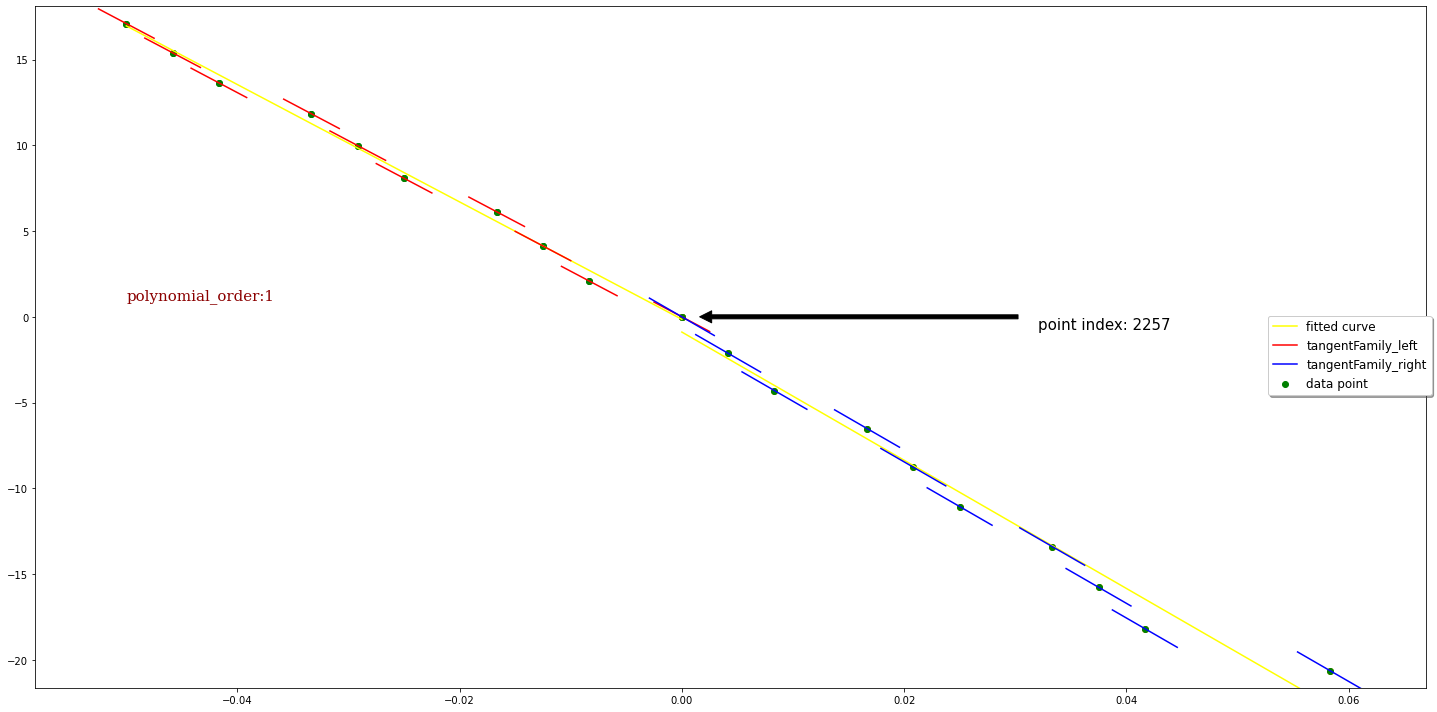

=======point_index=========== 2349


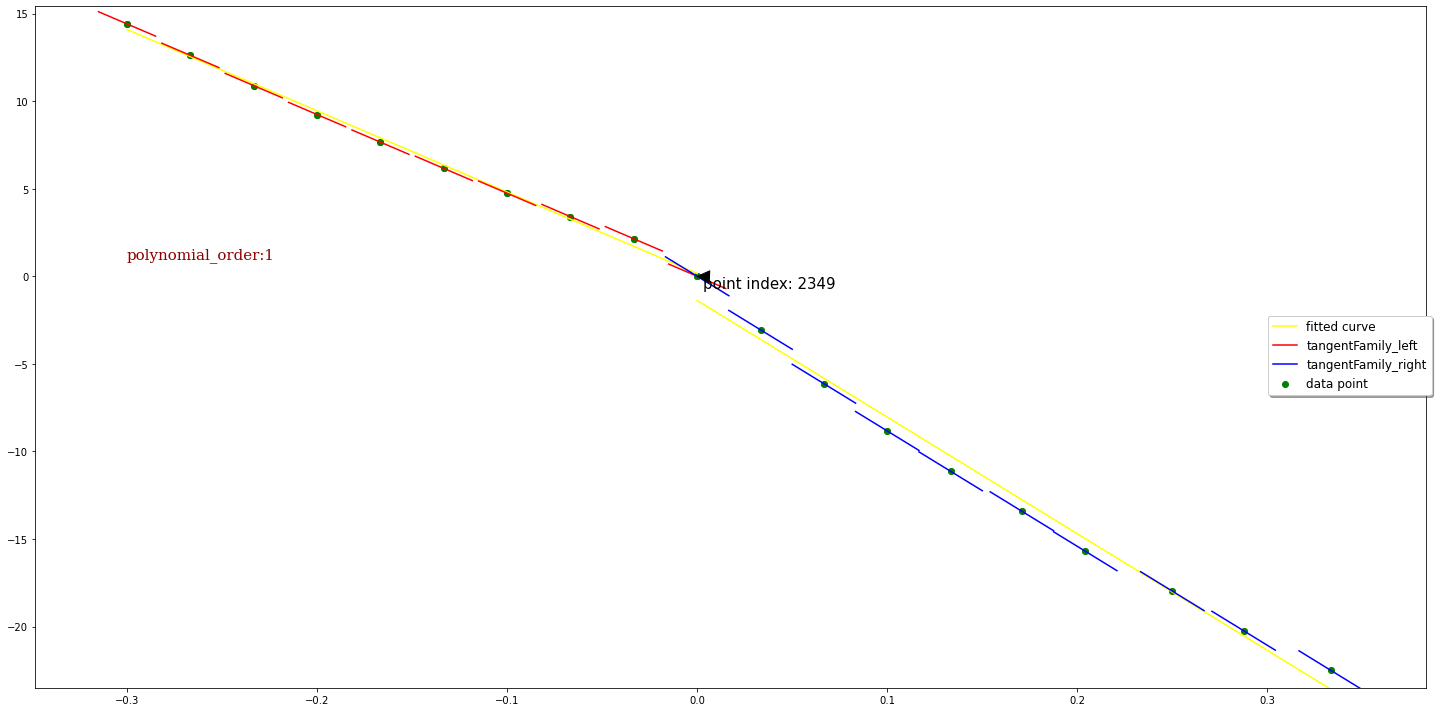

-------calculate_Parameters_allCurve using 'polynomial' fitting
   point_index  tangent_left  tangent_right
0        24216      -2.79996     -547.15789
1        24263    -276.60590     -500.81762


,point_index,tangent_left,tangent_right,deltaTangent,first_order_derivative,Elapsed time(hr)
0,24216,-2.79996,-547.15789,-544.35793,-701.517689,2900.999937
1,24263,-276.60590,-500.81762,-224.21172,-1008.874025,2901.712437


-------calculate_Parameters_allCurve using 'polynomial' fitting
=======point_index=========== 24216


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

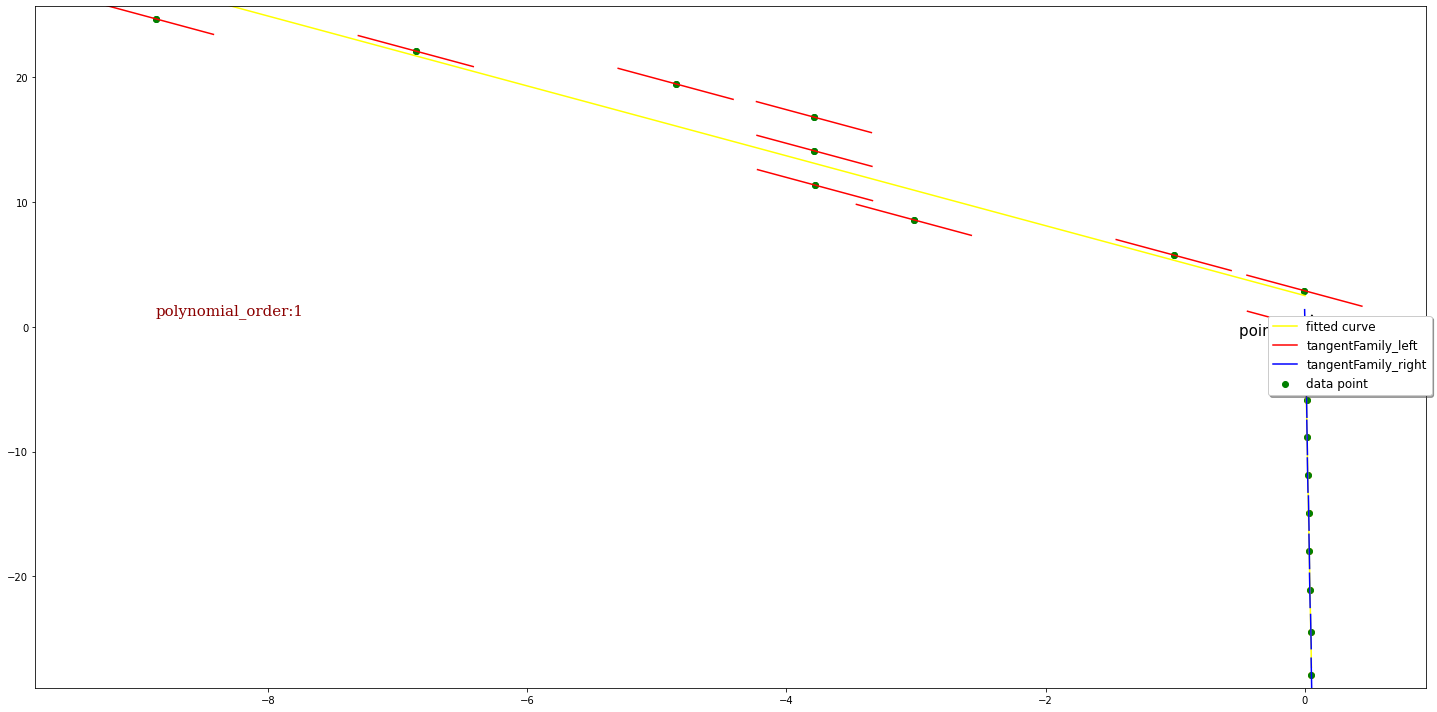

=======point_index=========== 24263


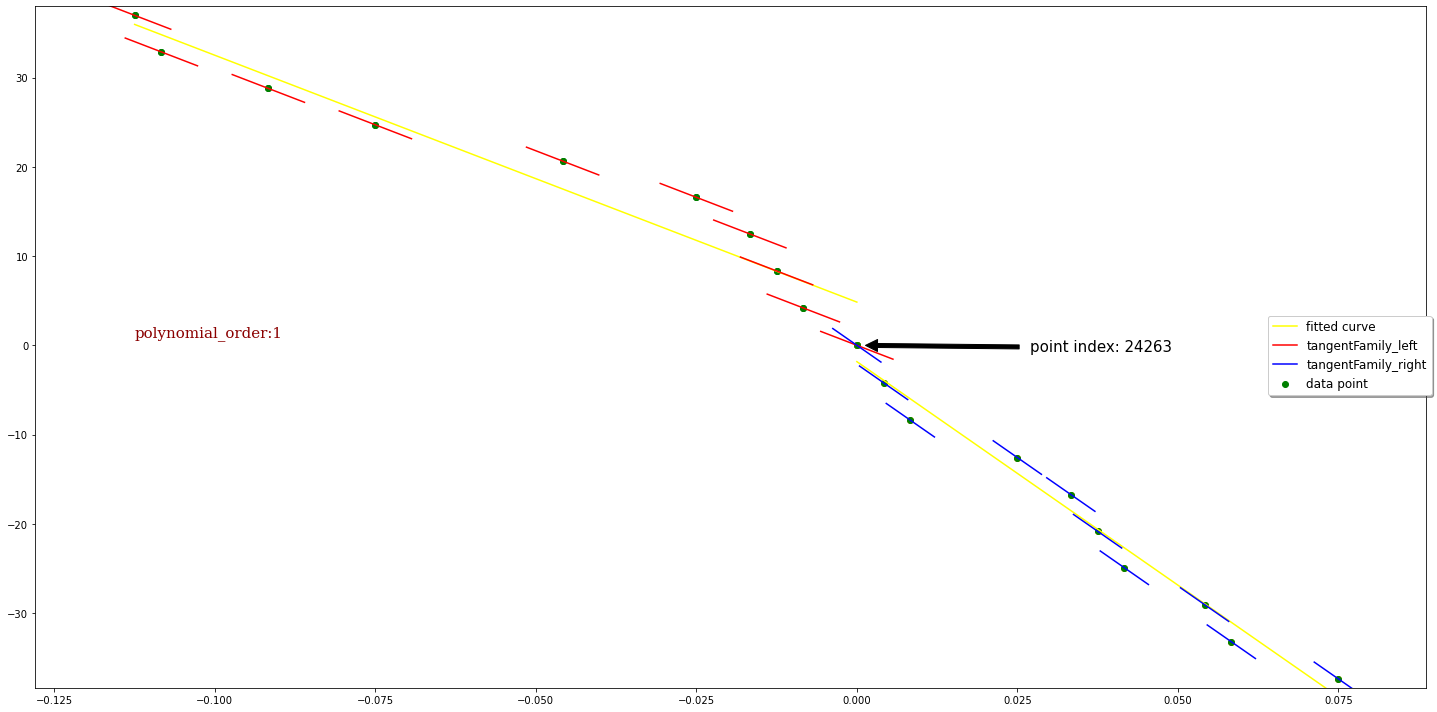

In [35]:
    
points=[13852, 13907, 13909, 13987]  
display(FOD_tangent.get_FOD_tangent(points))



points=[12391, 12463]  
display(FOD_tangent.get_FOD_tangent(points))
FOD_tangent.plot_tangent(points)

points=[9040,9125]  
display(FOD_tangent.get_FOD_tangent(points))
FOD_tangent.plot_tangent(points)


points=[2257,2349]  
display(FOD_tangent.get_FOD_tangent(points))
FOD_tangent.plot_tangent(points)


points=[24216, 24263]  
display(FOD_tangent.get_FOD_tangent(points))
FOD_tangent.plot_tangent(points)

In [26]:
%store -r startpoint_shutIn
%store -r startpoint_flowing
%store -r FOD_tangent_wholeData

In [27]:
FOD_tangent_startpoint_shutIn=FOD_tangent.get_FOD_tangent(startpoint_shutIn)
FOD_tangent_startpoint_flowing=FOD_tangent.get_FOD_tangent(startpoint_flowing)
display(FOD_tangent_startpoint_shutIn)

-------calculate_Parameters_allCurve using 'polynomial' fitting
-------calculate_Parameters_allCurve using 'polynomial' fitting


,point_index,tangent_left,tangent_right,deltaTangent,first_order_derivative,Elapsed time(hr)
0,2252,-2.58265,-370.14934,-367.56669,-456.920657,396.529188
1,2812,-16.77820,-244.18209,-227.40389,-552.015008,448.362522
2,3095,-2.89366,-400.85317,-397.95951,-416.555057,475.325022
3,3999,-145.12721,-223.17358,-78.04637,-348.248604,572.745872
4,4765,-293.93585,-267.61461,26.32124,-172.832528,681.520872
5,5304,-7.43579,-142.83809,-135.40230,-138.850592,839.018793
6,5985,-2.90692,-149.00729,-146.10037,-306.558613,914.727126
7,7265,-199.97029,-310.98128,-111.01099,-110.767984,1218.318793
8,7953,-23.57010,-184.63592,-161.06582,-97.637418,1261.764626
9,9023,-4.32560,-224.91261,-220.58701,-41.185911,1358.697960


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [11]:
def plot_histogram(data, xlabel:str, ylabel:str,title:str,number_bins:int=300)->None:
    # plt.style.use('ggplot')
    fig = plt.figure()
    plt.hist(data, bins=number_bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # plt.legend(legend)
    plt.title(title)
    plt.show

In [32]:
data_comparison=[FOD_tangent_wholeData, FOD_tangent_startpoint_flowing,FOD_tangent_startpoint_shutIn]
data_names=["FOD_tangent_wholeData", "FOD_tangent_startpoint_flowing","FOD_tangent_startpoint_shutIn"]
for data,data_name in zip(data_comparison,data_names):
    print(data_name)
    statistics_FOD_tangent=data.describe()
    
    display(statistics_FOD_tangent.drop(['point_index', 'Elapsed time(hr)'], axis = 1))
    


FOD_tangent_wholeData


,tangent_left,tangent_right,deltaTangent,first_order_derivative
count,29793.000000,29793.000000,29793.000000,29793.000000
mean,0.232305,0.227262,-0.005043,30.976450
std,131.751153,131.750574,69.925083,217.146348
min,-879.465820,-879.465820,-711.466930,-1177.363679
25%,-24.560370,-24.560370,-4.207670,-26.420592
50%,5.672020,5.654180,0.269390,6.578072
75%,36.568210,36.565290,7.580140,50.558700
max,1381.350970,1381.350950,1260.985330,1442.449150


FOD_tangent_startpoint_flowing


,tangent_left,tangent_right,deltaTangent,first_order_derivative
count,30.000000,30.000000,30.000000,30.000000
mean,-0.804650,27.410449,28.215099,19.304265
std,24.599441,50.045332,45.518002,62.831413
min,-107.495660,-43.912520,-1.824550,-154.046782
25%,-2.261213,8.105868,7.464765,2.753971
50%,2.045640,13.195065,12.124345,10.017752
75%,8.742262,32.191318,31.242170,20.642352
max,39.963160,257.875710,245.801530,252.758805


FOD_tangent_startpoint_shutIn


,tangent_left,tangent_right,deltaTangent,first_order_derivative
count,30.000000,30.000000,30.000000,30.000000
mean,-204.916498,-411.962577,-207.046080,-450.345451
std,236.411012,192.570022,213.760008,276.239194
min,-627.141120,-705.160860,-701.262890,-913.840053
25%,-428.994440,-569.243715,-334.086048,-696.322300
50%,-64.263035,-420.260330,-140.751335,-410.504236
75%,-3.853135,-228.055035,-67.641530,-209.648860
max,-1.459560,-60.772920,186.681490,-41.185911


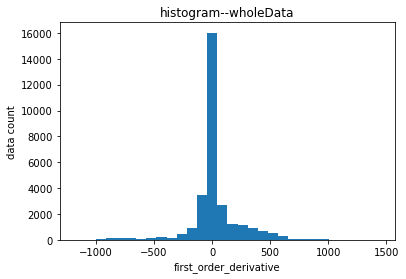

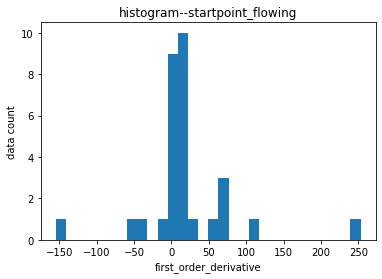

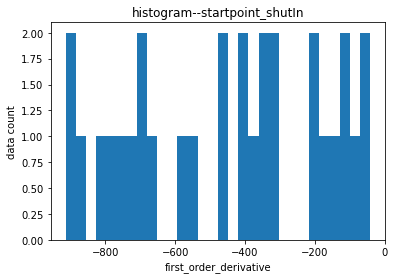

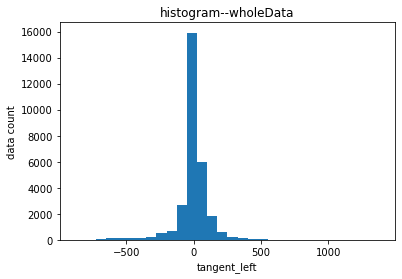

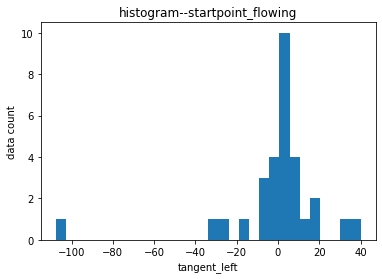

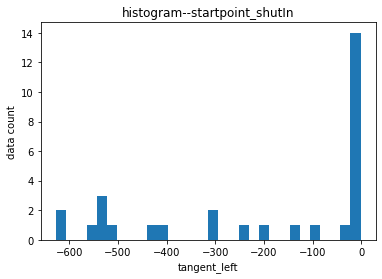

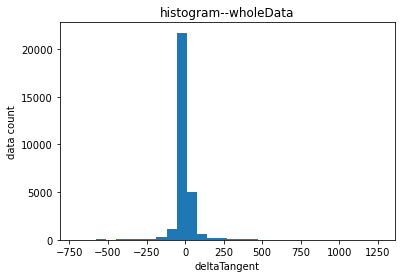

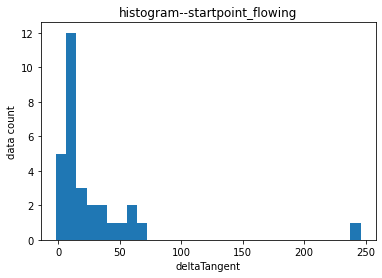

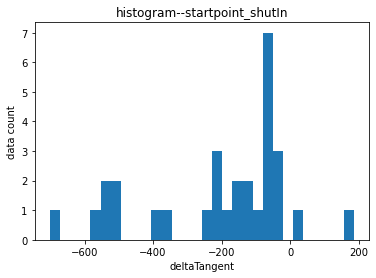

In [29]:
number_bins=30
titles=['histogram--wholeData','histogram--startpoint_flowing','histogram--startpoint_shutIn']
ylabel="data count"
for column in ["first_order_derivative","tangent_left","deltaTangent"]:
    xlabel=column
    data_comparison=[FOD_tangent_wholeData[column], FOD_tangent_startpoint_flowing[column],FOD_tangent_startpoint_shutIn[column]]
    for data,title in zip(data_comparison,titles):
        plot_histogram(data, xlabel, ylabel,title,number_bins)
        plt.savefig(f"{title}-{column}")

In [70]:
# data_rightWindow=[0,2,3,0,6,5]
data_rightWindow=[0,-2,-3,0,-6,-5]
data_rightWindow=[1,-2,-3,0,6,-5]
data_rightWindow=[0,2,3,0,6,-5]
def checkPoint_bysign(data_rightWindow):

    sign_remainings=[data_rightWindow[i]>0 for i in range(1,len(data_rightWindow)) if data_rightWindow[i]!=0]
#     data_remainings=data_rightWindow[1:]
#     sign_switch=True
#     for i,pressure in enumerate(pressure_measure_rightWindow):
#         if i==0:
#             first_pressure=pressure
#         elif pressure==0:
#             continue
#         else:
#             if not (first_pressure>=0)^(pressure>=0):
#                 sign_switch=False
#                 break
    if all(sign_remainings) and data_rightWindow[0]<=0:
        return "buildUp"
    elif (not any(sign_remainings)) and data_rightWindow[0]>=0:
        return "drawDown"
    else:
        return "Not break point"

print(checkBreakPoint_bysign(data_rightWindow))
    

Not break point
